In [118]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import time
%matplotlib inline 

## Import Data

In [2]:
raw_scheme = pd.read_csv('flights.csv')
raw_scheme.columns = ['Flight','Origin','Destination','1','2','3','4','5','6','7','STD','STA','AddDay']
# raw_scheme.head(3)

In [3]:
# raw_scheme[(raw_scheme['Destination'] == 'BKK') & (raw_scheme['Origin'] == 'SIN') ]
# raw_scheme[(raw_scheme['Destination'] == 'SIN') & (raw_scheme['Origin'] == 'HKG') ]

In [4]:
expand = pd.melt(raw_scheme,id_vars=['Flight','Origin','Destination','STD','STA','AddDay'],value_vars=['1','2','3','4','5','6','7'])
final = expand[expand['value']!='.']

In [5]:
nodes = list(set(final['Origin'].unique().tolist() + final['Destination'].unique().tolist()))
nodes[1]

'DEN'

In [121]:
# final[(final['Destination'] == 'HKG') & (final['Origin'] == 'SIN') ]

## MultiDiGraph Experiment

In [25]:
G = nx.MultiDiGraph()
# G.add_nodes_from(range(100,110))
G.add_edge(1,2,key='SIN',flight='SQ1')
G.add_edge(1,2,key=2,flight='SQ2')
G.add_edge(3,4,key=3,flight='SQ3')
G.add_edge(3,4,flight='SQ4')
G.add_edge(3,4,key=3,flight='SQ5')

In [26]:
G.out_edges(3,keys=True,data=True)

[(3, 4, 1, {'flight': 'SQ4'}), (3, 4, 3, {'flight': 'SQ5'})]

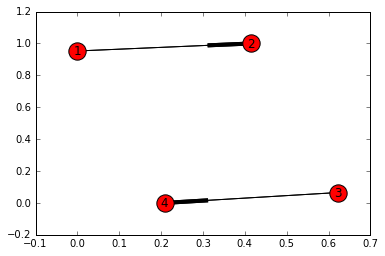

In [9]:
nx.draw_networkx(G)

## Using Digraph to get shortest path

In [71]:
# G = nx.MultiDiGraph()
G = nx.DiGraph()
G.add_nodes_from(nodes)
# G.add_node('SIN')
# G.add_node('BKK')

for key,row in final.iterrows():
    G.add_edge(row['Origin'],row['Destination'],dow=row['value'],flight=row['Flight'],STD=row['STD'],STA=row['STA'])
# G.add_nodes_from(range(100,110))
# H=nx.Graph()
# H.add_path([0,1,2,3,4,5,6,7,8,9])
# G.add_nodes_from(H)
# G.add_node(H)
# G.add_edges_from([(11,21),(11,31)])
# G.add_edges_from([(4,5,dict(route=282)), (4,5,dict(route=37))])
# G.add_edges_from([(14,15,route=282), (14,15,route=37)])

# G[4]

# nx.draw_networkx(G)

In [72]:
print(nx.shortest_path_length(G,source='SIN',target='HKG'))
# nx.shortest_path(G,source='SIN',target='HKG')
eg = nx.all_shortest_paths(G,source='SIN',target='HKG')
for e in eg:
    print(e)

1
['SIN', 'HKG']


In [45]:
eg = nx.all_pairs_shortest_path(G)
# eg['SIN']

## MultiDiGraph

In [73]:
G = nx.MultiDiGraph()
G.add_nodes_from(nodes)

for key,row in final.iterrows():
    G.add_edge(row['Origin'],row['Destination'],dow=row['value'],flight=row['Flight'],STD=row['STD'],STA=row['STA'])

# nx.draw_networkx(G)

In [120]:
eg = nx.all_shortest_paths(G,source='SIN',target='HKG',weight='AddDay')
# for e in eg:
#     print(e)

In [113]:

format = '%H:%M'
time2 = "2017 14:00"
time1 = "2017 08:00"
# time.mktime(time.strptime(time1, format))

tc2a = time.strptime(time2,"%Y %H:%M")
tc1a = time.strptime(time1,"%Y %H:%M")

diff_hours = (time.mktime(tc2a) - time.mktime(tc1a))/3600
diff_hours

6.0

In [161]:
startdow = 1
tformat = "%Y %H:%M"
startstd = time.mktime(time.strptime('2017 14:00',tformat))
orig = 'SIN'
dest = 'HKG'
path = ['SIN','HKG']

matrix = G.get_edge_data('SIN','HKG')
smatrix = sorted(matrix.items(), key=lambda v: (v[1]['dow'],v[1]['STD']),reverse=False)
#v[0] is key, v[1] is item

for s,row in  smatrix:
    if int(row['dow']) == startdow:
        sta = time.mktime(time.strptime('2017 '+ row['STA'],tformat))
        std = time.mktime(time.strptime('2017 '+ row['STD'],tformat))
#         print(row)
        if std > startstd:
            print('---')
            break
#             print(row)
        
#     print(row['dow'])



---


In [57]:
# G.degree('BKK')
# for (u,v) in G.in_edges_iter('SIN'):
#     print(G.get_edge_data(u,v))
#     print('-----')

In [134]:
nx.write_gexf(G,"test.gexf")

## Digraph Experiments

In [27]:
g = nx.DiGraph()
g.add_node(17)
g.add_edge(23,48,dow=1)
g.node[17]['ICAO'] = 'SIN'
g.add_edge(77,88,label='hello')

In [6]:
g.node[17]

{'ICAO': 'SIN'}

In [11]:
g.edges(data=True)

[(23, 48, {'dow': 1})]

In [12]:
g[23][48]

{'dow': 1}

In [21]:
g[11][14]['detail'][0]

{'AddDay': '0', 'DOW': 1, 'Flight': '3S110', 'STA': '7:15', 'STD': '11:45'}

In [7]:
17 in g.nodes()

True

In [28]:
# nx.draw_random(g)
# pos=nx.draw_circular(g)
# nx.draw_networkx_labels(g,pos)
nx.write_gexf(g,"test.gexf")

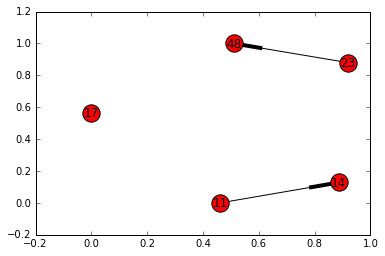

In [23]:
nx.draw_networkx(g)

## Open Flights

In [27]:
route = pd.read_csv('routes.dat',header=0)
airport = pd.read_csv('airports.dat')
airline = pd.read_csv('airlines.dat')

In [30]:
airline_fieldnames = ['id','name','alias','iata','icao','callsign','country','active']
airport_fieldnames = ['id','name','city','country','iata_faa','icao','latitude','longitude'
                      ,'altitude','timezone','dst', 'tz_timezone']
route_fieldnames = ['airline','airline_id','source_airport','source_airport_id','destination_airport','destination_airport_id',
                     'codeshare','stops','equipment']